# Принятие решений в бизнесе

Данный проект мы выполняем в качестве аналитика крупного интернет-магазина. Вместе с отделом маркетинга ми подготовили список гипотез для увеличения выручки.

**Цели исследования:**
1. приоритизировать гипотезы
2. запустить A/B тест и проанализировать резульаты

В ходе выполнения целей проект будет поделен на две части.

**Часть 1. Приоритизация гипотез**

**Данные:**

Данные для исследования будут получены из файла `/datasets/hypothesis.csv`
В нем хранятся данные о 9-ти гипотезах по увеличению выручки интернет-магазина с указанными параметрами ``Reach``, ``Impact``, ``Confidence``, ``Effort``.

**Описание данных:**
- ``Hypothesis`` — краткое описание гипотезы
- ``Reach`` — охват пользователей по 10-балльной шкале;
- ``Impact`` — влияние на пользователей по 10-балльной шкале;
- ``Confidence`` — уверенность в гипотезе по 10-балльной шкале;
- ``Efforts`` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение ``Efforts``, тем дороже проверка гипотезы.

**Ход исследования:**

Для выполнения целей исследования первой части проекта будет необходимо:
- применить фреймворк ``ICE`` для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- применить фреймворк ``RICE`` для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- указать, как изменилась приоритизация гипотез при применении ``RICE`` вместо ``ICE``. Сделать выводы.

**Часть 2. Анализ A/B-теста**

**Данные:**

Данные для исследования будут полученны из файлов:
- ``/datasets/orders.csv``
- ``/datasets/visitors.csv``

В первую очередь необходимо будет провести предобработку данных, а именно проверить данные на наличие пропусков и дубликатов.
Далее необходимо проверить типы данных, при необходимости заменить названия столбцов. Особенное внимание стоит уделить значениям с датой и временем.

**Описание данных:**

``/datasets/orders.csv``
- ``transactionId`` — идентификатор заказа
- ``visitorId`` — идентификатор пользователя, совершившего заказ
- ``date`` — дата, когда был совершён заказ
- ``revenue`` — выручка заказа;
- ``group`` — группа A/B-теста, в которую попал заказ

``/datasets/visitors.csv``
- ``date`` — дата
- ``group`` — группа A/B-теста
- ``visitors`` — количество пользователей в указанную дату в указанной группе A/B-теста

**Ход исследования:**
- предобработка данных
- построение графика кумулятивной выручки по группам
- построение графика кумулятивного среднего чека по группам
- постройте графика относительного изменения кумулятивного среднего чека группы B к группе A
- построение графика кумулятивного среднего количества заказов на посетителя по группам
- построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
- построение точечного графика количества заказов по пользователям.
- рассчет 95-го и 99-го перцентиля количества заказов на пользователя. Выбор границы для определения аномальных пользователей
- построение точечный графика стоимостей заказов
- рассчет 95-й и 99-й перцентиля стоимости заказов. Выбор границы для определения аномальных заказов
- рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным
- рассчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным
- рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
- рассчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным
- решение по результатам теста


In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt


pd.options.display.max_colwidth = 150

##  Приоритизация гипотез

Взглянем на датасет с гипотезами:

In [2]:
df = pd.read_csv('/datasets/hypothesis.csv')
df.columns = df.columns.str.lower()
df.head()

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


### фреймворк ICE

In [3]:
df['ice'] = round(df['impact'] * df['confidence'] / df['efforts'], 2)
df[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### фреймворк RICE

In [4]:
df['rice'] = df['reach'] * df['impact'] * df['confidence'] / df['efforts']
df[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [5]:
print(df.iloc[8][0])
print(df.iloc[7][0])

Запустить акцию, дающую скидку на товар в день рождения
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


### Вывод

Мы получили два списка гипотез проранжированных с помощью фреймфорков ICE и RICE. С учетом того, что фреймворк RICE включает в себя учет охвата пользователей ``reach`` в отличии от ICE, мы видим различия между рангами приоритетов гипотез.

При применении фреймворка RICE можно отметить, что гипотеза с индексом ``8`` опустилась с первой на пятую позицию, что в свою очередь свидетельствует о низком охвате пользователей, которых костется изменение.
Справедливо можно отметить и гипотезу с индексом ``7``. С учетом показателей охвата поьзователей, которых коснется изменение она является наиболее приоритетной.

Причина по которой гипотеза **Запустить акцию, дающую скидку на товар в день рождения** опустилась в фреймворке RICE: 
вероятность того, что пользователи не всегнда указывают дату рождения, а те пользователи у которых указан день рождения не всегда готовы покупать в этот день. Возможно стоит рассмотреть более длительный период предоставления скидки относительно дня рождения.

Причина по которой гипотеза **Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок**
стала наиболее приоритетной во фреймворке RICE: охват в этой гипотезе является максимальным, так как мы собираемся добавлять форму на все основные страницы, поэтому эту форму должны увидеть почти все пользователи.




## Анализ A/B-теста

### Предобработка данных

#### Работа с данными

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [9]:
orders.shape

(1197, 5)

Для начала заменим названия колонок на названия в snake_case, и изменим тип данных в колонке ``date``:

In [10]:
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True)
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.shape

(62, 3)

Как и в случае с первым датасетом, поменяем тип данных в столбце ``date``:

In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Проверим датасеты на пропуски и явные дубликаты:

In [15]:
datasets = [orders, visitors]
for i in datasets:
    print(i.isna().sum())

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [16]:
for i in datasets:
    print(i.duplicated().sum())

0
0


Все данные приведены к нужному типу. Пропущенных значний нет. Явных дубликатов нет. Можно приступать к следующему шагу проекта.

#### Обзор данных

Взглянем подробней на данные и посмотрим на характеристики групп:

In [17]:
print(orders['group'].unique())
print(visitors['group'].unique())

['B' 'A']
['A' 'B']


In [18]:
print('Таблица orders:', orders['date'].min())
print('Таблица orders:', orders['date'].max())
print('Таблица visitors:', visitors['date'].min())
print('Таблица visitors:', visitors['date'].max())

Таблица orders: 2019-08-01 00:00:00
Таблица orders: 2019-08-31 00:00:00
Таблица visitors: 2019-08-01 00:00:00
Таблица visitors: 2019-08-31 00:00:00


In [19]:
orders.groupby('group').agg({'visitor_id':['count', 'nunique']})

visitor_id        
           count nunique
group                   
A            557     503
B            640     586

Перед нами результаты резльтаты A/B теста, проведенного с 2019-08-01 по 2019-08-31. В тесте принимало участие две группы (А и В). В группу А попало 503 уникальных пользователя, а в группу В 586.

Посмотрим, есть ли пересечения в группах:

In [20]:
group_counts = orders.groupby('visitor_id', as_index=False).agg({'group':'nunique'})
print('Количество пользователей в двух группах:',group_counts[group_counts['group'] > 1].count()['group'])
print(round(group_counts[group_counts['group'] > 1].count()['group'] / orders['visitor_id'].nunique(), 3))

Количество пользователей в двух группах: 58
0.056


В результате проведения теста, мы получили **58** пользователей или **5.6%** от общего количества уникальных польвателей, которые попали в обе группы. С одной стороны логично не принимать в рассчет этих пользователей, с другой, данные этих пользователей являются частью данных в таблице ``visitors`` в части количетсва визитов в день. Поэтому принято решение оставить этих пользователей в датасете, но с оговоркой в конечном выводе.

### Кумулятивная выручка по группам

Создадим датасет из уникальных пар дат и групп:

In [21]:
dates_groups = orders[['date','group']].drop_duplicates()
dates_groups.sort_values(by='date').head(10)

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B
291,2019-08-03,A
310,2019-08-03,B
498,2019-08-04,B
499,2019-08-04,A
699,2019-08-05,B
698,2019-08-05,A


Для дальнейшего анализа создадим датасет, содержащий куммулятивные значения по выручке, для этого сгруппируем данные таким образом что-бы полуить данные за каждый день по гуппрам с накомлением по уникальным ``visitor_id`` и накоплением по сумме ``revenue``:

In [22]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                       orders['group'] == x['group'])]
.agg({'date' : 'max',
      'group' : 'max',
      'transaction_id' : 'nunique',
      'visitor_id' : 'nunique',
      'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) 

In [23]:
orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [24]:
cum_revenue_a = orders_aggregated[orders_aggregated['group']=='A'][['date','transaction_id', 'revenue']]
cum_revenue_b = orders_aggregated[orders_aggregated['group']=='B'][['date','transaction_id', 'revenue']]

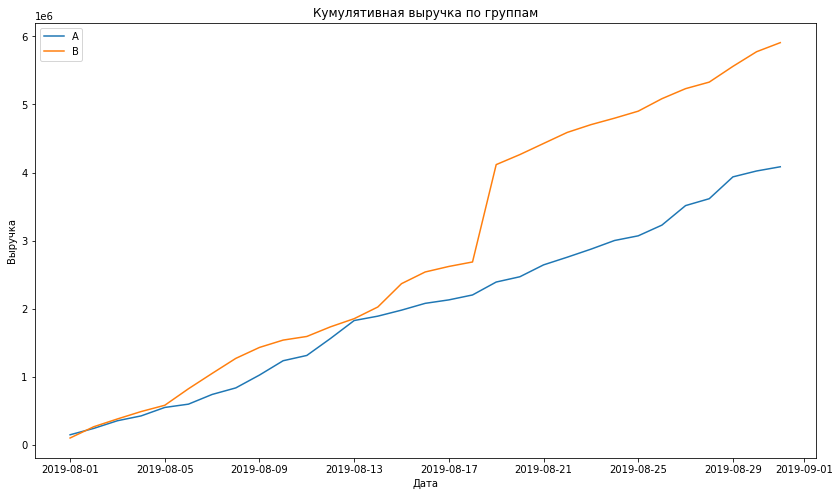

In [25]:
plt.figure(figsize=(14,8))
plt.plot(cum_revenue_a['date'], cum_revenue_a['revenue'], label='A')
plt.plot(cum_revenue_b['date'], cum_revenue_b['revenue'], label='B')
plt.legend()
plt.figsize=(10,8)
plt.title('Кумулятивная выручка по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата');

На графике можно заметить, что в период между 2019-08-17 и 2019-08-17 в группе В резко выросла выручка, что может быть свидетельством увеличения числа заказов или наличия очень дорогих заказов. В целом до этого периода накомленная выручка гпуппы В больше чем у группы А. Для более детального анализа необходимо будет проанализировать данные без явных выбросов.

### Кумулятивный средний чек по группам

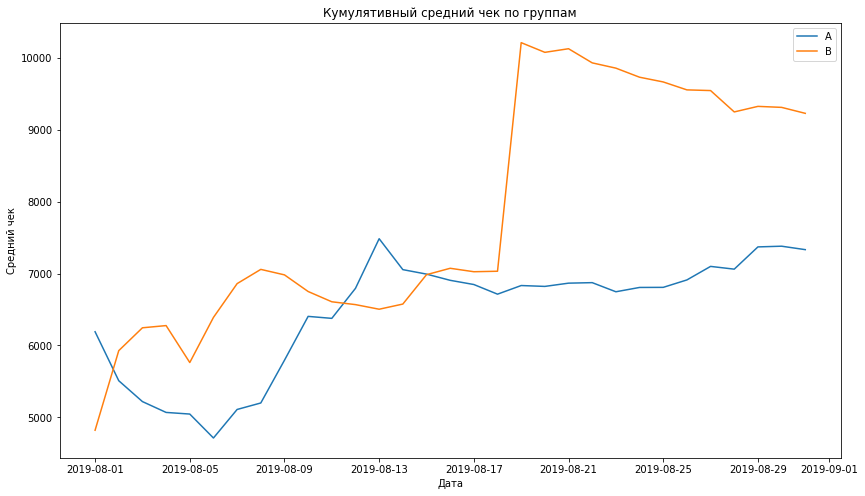

In [26]:
plt.figure(figsize=(14,8))
plt.plot(cum_revenue_a['date'], cum_revenue_a['revenue'] / cum_revenue_a['transaction_id'], label='A')
plt.plot(cum_revenue_b['date'], cum_revenue_b['revenue'] / cum_revenue_b['transaction_id'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата');

На графике так же как и в предыдущем заметен всплеск значания среднего кумулятивного чека у группы В в те же даты. Это говорит о том, что резкий рост выручки был связан не с увеличением количества заказов в эти даты, а с заказами на очень большие суммы, которые не типичны для остального пириода.

В целом на графике видна тенденция к увеличению среднего чека за период в обоих группах.

### Относительное изменение кумулятивного среднего чека группы B к группе A

Для того, чтобы соотнести средние чеки у групп, соеденим два датасета ``cum_revenue_a`` и ``cum_revenue_b`` и постоим график отношения ``средний чек группы B`` / ``средний чек группы A`` - ``1``

In [27]:
сum_revenue = cum_revenue_a.merge(cum_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
сum_revenue.head()

,date,transaction_id_a,revenue_a,transaction_id_b,revenue_b
0,2019-08-01,24,148579,21,101217
1,2019-08-02,44,242401,45,266748
2,2019-08-03,68,354874,61,380996
3,2019-08-04,84,425699,78,489567
4,2019-08-05,109,549917,101,581995


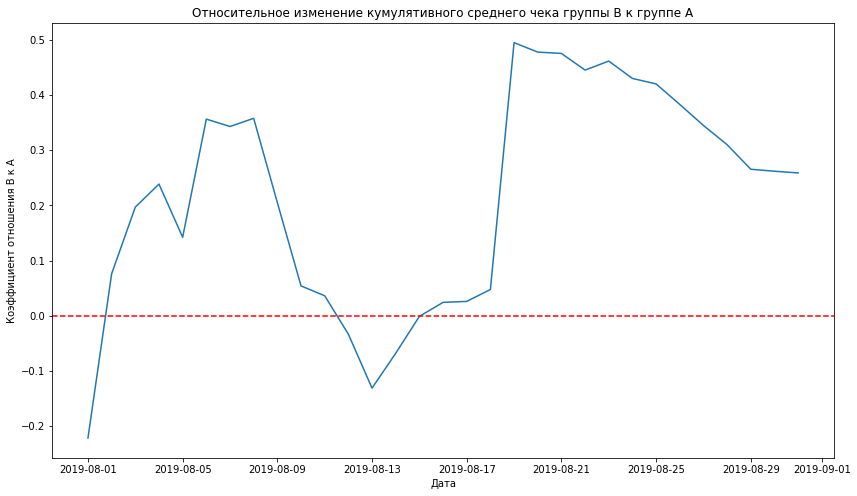

In [28]:
plt.figure(figsize=(14,8))
plt.plot(сum_revenue['date'], (сum_revenue['revenue_b']/сum_revenue['transaction_id_b'])/
                              (сum_revenue['revenue_a']/сum_revenue['transaction_id_a'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.ylabel('Коэффициент отношения В к А')
plt.xlabel('Дата');

На графике видны два резких скачка отношения средних чеков группы В к группе А. С периодом между 2019-08-17 и 2019-08-17 мы разобрались с помощью предыдущих графиков, там наблюдается явный выброс по стоимости чека в заказе у группы В. В периоде между 2019-08-07 и 2019-08-13 наблюдается резкое уменьшение значение отношения средних чеков, взглянув еще раз на график кумулятивных средних чекови выручки, можно сделать вывод о том, что в этот период у группы А, так же были аномально высокие значения чеков но в выручке всплесков не было, как следствие, можно предположить, что колиество заказов в группе А в этот период падало.

### Кумулятивное среднее количество заказов на посетителя по группам

Для того, чтобы посмотреть на график кумулятивного среднего количества заказов на посетителя по группам, создатим датафрейм с кумулятивными значениями количества посетителей по датам и группам.

In [29]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                           visitors['group'] == x['group'])]
                                         .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

Присоеденим к датафрейму ``orders_aggregated`` значения из ``visitors_aggregated``

In [30]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [31]:
cumulative_data.head()

,date,group,transaction_id,visitor_id,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Получили датафрейм со кумулятивными значениями колиества заказов, уникальных пользователей, которые сделали заказ, выручки и всех посетителей разбитых по датам и группам

In [32]:
cumulative_data_a = cumulative_data[cumulative_data['group']=='A'][['date','transaction_id', 'revenue', 'visitors']]
cumulative_data_b = cumulative_data[cumulative_data['group']=='B'][['date','transaction_id', 'revenue', 'visitors']]

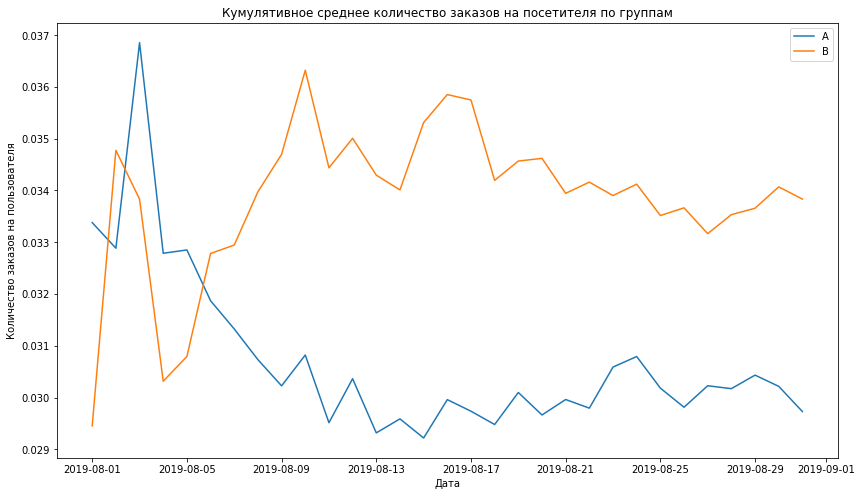

In [33]:
plt.figure(figsize=(14,8))
plt.plot(cumulative_data_a['date'], cumulative_data_a['transaction_id'] / cumulative_data_a['visitors'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['transaction_id'] / cumulative_data_b['visitors'], label='B')
plt.legend()
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.ylabel('Количество заказов на пользователя')
plt.xlabel('Дата');

В подтверждение вывода из предыдущего графика видно, что в начале периода наблюдения среднее количество заказов группы А упало до значения 0.03, а у группы В выросло и стабилизировалось на значении 0.035.

В начале проведения теста вреднее количество заказов на посетителя колебалось у обоих групп, а затем стабилизировалось. Возможно в период первой недели была сезонная распродажа или работала маркетинговая компания.

### Относительное изменение среднего количества заказов на посетителя группы B к группе A

In [34]:
сum_data = cumulative_data_a.merge(cumulative_data_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
сum_data.head()

,date,transaction_id_a,revenue_a,visitors_a,transaction_id_b,revenue_b,visitors_b
0,2019-08-01,24,148579,719,21,101217,713
1,2019-08-02,44,242401,1338,45,266748,1294
2,2019-08-03,68,354874,1845,61,380996,1803
3,2019-08-04,84,425699,2562,78,489567,2573
4,2019-08-05,109,549917,3318,101,581995,3280


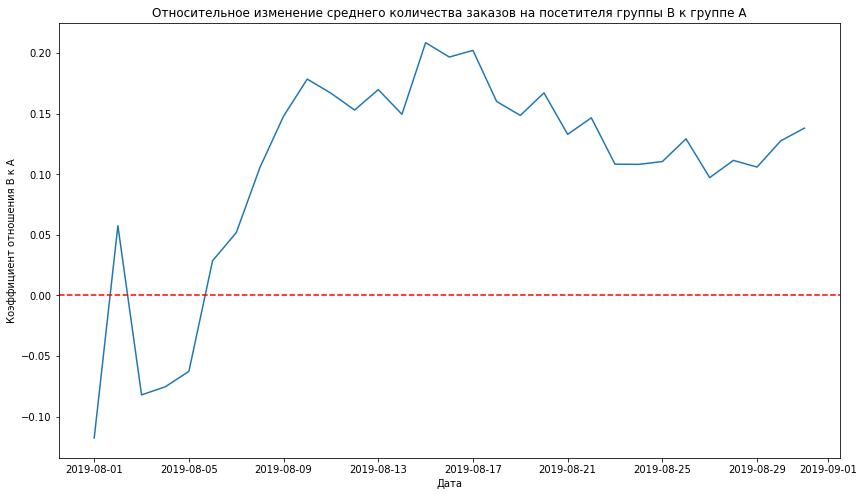

In [35]:
plt.figure(figsize=(14,8))
plt.plot(сum_data['date'], (сum_data['transaction_id_b']/сum_data['visitors_b'])/
                              (сum_data['transaction_id_a']/сum_data['visitors_a'])-1)
plt.axhline(y=0, color='red', linestyle='--') 
plt.title('Относительное изменение среднего количества заказов на посетителя группы B к группе A')
plt.ylabel('Коэффициент отношения В к А')
plt.xlabel('Дата');

На графике видно, что после 2019-08-05 значение отношения стабильно росло, а значит среднее количество заказов на посетителя в группе В росло относительно группы А. После 2019-08-06 значение зафиксировалось выше нуля, соответственно среднее количество заказов на посетителя группы В стало больше чем в группе А. Возможно это свидетельствует о результатах работы фичей, которые были добавлены до проведения теста. Но делать окончательные выводы рано, поскольку мы пока рассматриваем сырые данные с выбросами в значениях.

### Количество заказов по пользователям

In [36]:
orders_count = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_count.head()

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


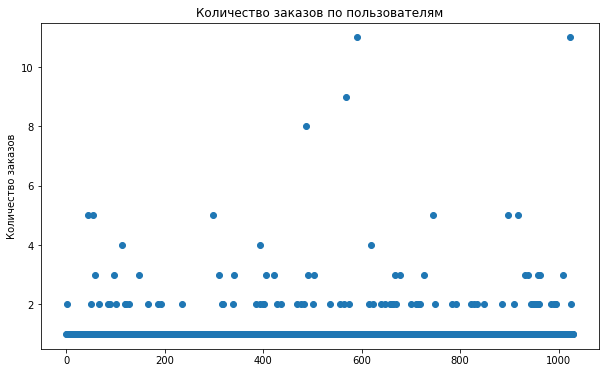

In [37]:
x_values = pd.Series(range(0,len(orders_count)))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders_count['transaction_id'])
plt.title('Количество заказов по пользователям')
plt.ylabel('Количество заказов');

Большинство пользователей совершали от 1-го до 3-х или 5-ти заказов. Необходимо посмотреть их долю, чтобы определить количество заказов, которые можно расценивать как выбросы.

### 95-й и 99-й перцентили количества заказов на пользователя

In [38]:
print(np.percentile(orders_count['transaction_id'], [95, 99]))

[2. 4.]


Менее 5% посетителей делало более 2-х заказов и менее 1% делало более 4 заказов. Для дальнейшего анализа выберем 2 заказа, как пороговое значение для определния выбросов.

### Стоимость заказов

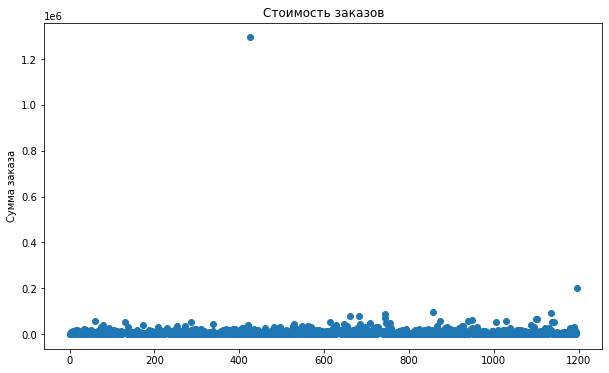

In [39]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.ylabel('Сумма заказа');

На графике видно два дорогих заказа, которые выбиваются из общей массы. Рассмотрим смоимости без них:

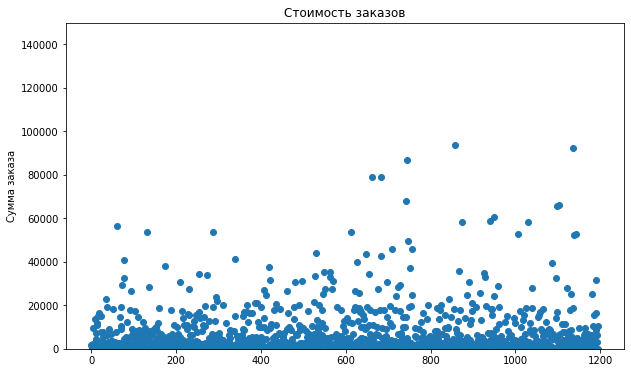

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 150000)
plt.title('Стоимость заказов')
plt.ylabel('Сумма заказа');

На графике видно, что основная часть заказов менее 30000. Необходимо так, же посмотреть 95-й и 99-й перцентили, для того, чтобы определить границу выбросов по смоимости заказа.

### 95-й и 99-й перцентили стоимости заказов

In [41]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Менее 5% заказов выполняются на сумм более 28000 и менее 1% заказов на сумму более 58233. Для определния выброса по сумме заказа, выберем значение 95-го перцентиля, а именно значение суммы 28000

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Для определения теста, проверим распределения в группах на нормальность с помощью критерия Шапиро-Уилка, на нулевую гипотезу примем утверждение, что распределение нормально:

In [42]:
alpha = 0.05
samples = [cumulative_data_a, cumulative_data_b]
for i in samples:
    results = stats.shapiro(i['transaction_id'] / i['visitors'])
    p_value = results[1]
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: распределение не нормально')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, всё нормально')

Отвергаем нулевую гипотезу: распределение не нормально
Отвергаем нулевую гипотезу: распределение не нормально


Распределения средних количеств заказов на посетителя в обеих группах распределены не нормально, поэтому будем использовать непараметрический тест Уилкоксона-Манна-Уитни.
- Нулевая гипотеза: среднее количество заказов на посетителя в группах равны
- Альтернативаная гипотеза: среднее количество заказов на посетителя в группах не равны

Подготовим данные для проведения теста:

Создадим таблички с кумулятивными визитами за день для каждой группы:

In [43]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}),axis=1)

visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}),axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [44]:
print(visitors_a_cummulative.head())
print(visitors_b_cummulative.head())

        date  visitors_cummulative_a
0 2019-08-01                     719
1 2019-08-02                    1338
2 2019-08-03                    1845
3 2019-08-04                    2562
4 2019-08-05                    3318
         date  visitors_cummulative_b
31 2019-08-01                     713
32 2019-08-02                    1294
33 2019-08-03                    1803
34 2019-08-04                    2573
35 2019-08-05                    3280


Создадим таблички с кумулятивным количеством заказов и общей выручкой за день для каждой группы:

In [45]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))

orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}),axis=1)\
.sort_values(by=['date'])
orders_a_cummulative.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}),axis=1)\
.sort_values(by=['date'])
orders_b_cummulative.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


In [46]:
print(orders_a_cummulative.head())
print(orders_b_cummulative.head())

        date  orders_cummulative_a  revenue_cummulative_a
0 2019-08-01                    24                 148579
1 2019-08-02                    44                 242401
2 2019-08-03                    68                 354874
3 2019-08-04                    84                 425699
4 2019-08-05                   109                 549917
        date  orders_cummulative_b  revenue_cummulative_b
0 2019-08-01                    21                 101217
1 2019-08-02                    45                 266748
2 2019-08-03                    61                 380996
3 2019-08-04                    78                 489567
4 2019-08-05                   101                 581995


Объеденим полученные данные по дате в одну таблицу:

In [47]:
data = (
    orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left'))

In [48]:
data.head()

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим таблички с количеством заказов посетителей, которые сделали как минимум 1 заказ:

In [49]:
orders_by_users_a = (orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))

orders_by_users_b.columns = ['visitor_id', 'orders']

In [50]:
print(orders_by_users_a['orders'].max())
print(orders_by_users_b['orders'].max())

7
6


Мы получили максимальное количество заказов на пользователя в групе А - 7, в группе В - 6, но на графике выше было значение 11 заказов. Необходимо на всякий случай проверить:

In [51]:
max_orders = orders.groupby('visitor_id')[['visitor_id']].count()
max_orders[max_orders['visitor_id'] == 11]

,visitor_id
visitor_id,
2458001652,11
4256040402,11


In [52]:
orders[orders['visitor_id'] == 2458001652]

,transaction_id,visitor_id,date,revenue,group
133,3060563671,2458001652,2019-08-22,5190,A
380,1177690313,2458001652,2019-08-25,2385,B
454,3755354294,2458001652,2019-08-06,7349,B
456,543654048,2458001652,2019-08-06,1620,A
483,2280027650,2458001652,2019-08-06,6681,B
611,1244084011,2458001652,2019-08-04,340,A
692,3586870909,2458001652,2019-08-09,5227,B
727,3959083601,2458001652,2019-08-07,17379,A
883,2412219836,2458001652,2019-08-05,2420,B
916,527333943,2458001652,2019-08-08,5227,B


In [53]:
orders[orders['visitor_id'] == 4256040402]

,transaction_id,visitor_id,date,revenue,group
60,1421016313,4256040402,2019-08-16,56650,B
114,1120327437,4256040402,2019-08-01,5800,A
187,2048878902,4256040402,2019-08-17,1550,A
253,1610091760,4256040402,2019-08-23,16950,A
263,2575861846,4256040402,2019-08-18,10970,B
588,3700356838,4256040402,2019-08-20,17650,A
873,2519737434,4256040402,2019-08-08,58220,B
901,3402467119,4256040402,2019-08-27,1630,A
1018,1415970216,4256040402,2019-08-31,5170,A
1019,453824282,4256040402,2019-08-31,1850,B


Как видно, максимальное количество заказов равное 11, это заказы пользователей, которые попали в обе группы.

Добавим к этим данным, пользователей, которые не совершали заказов:

In [54]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_a'].sum() 
                          - len(orders_by_users_a['orders'])),
                                name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(0, index=np.arange(
                          data['visitors_per_date_b'].sum()
                          - len(orders_by_users_b['orders'])),
                                name='orders')],axis=0)

Критический уровень статистической значимости установим в размере 0.05

In [55]:

print('p-value', stats.mannwhitneyu(sample_a, sample_b)[1])
print("Относительное изменение метрики: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value 0.016792355056752608
Относительное изменение метрики: 0.138


В результате проведения теста мы получили статистически значимые различия между средним количеством заказов на посетителя в разных группах. При этом показатель группы В больше на **13.8%** относительно группы А. Для окончательного вывода необходимо будет проверить значения без выбросов

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Для определения теста, проверим распределения в группах на нормальность с помощью критерия Шапиро-Уилка, на нулевую гипотезу примем утверждение, что распределение нормально:

Распределения среднего чека в обеих группах распределены не нормально, поэтому будем использовать непараметрический тест Уилкоксона-Манна-Уитни, критический уровень статистической значимости установим в размере 0.05.
- Нулевая гипотеза: средниие чеки в граппах В и А равны
- Альтернативаня гипотеза: средние чеки в группах В и А не равны

In [58]:
print('p-value:', stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])
print("Относительное изменение метрики: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.7292909855432458
Относительное изменение метрики: 0.259


В результате проведения теста у нас не получилось отвергнуть нулевую гипотезу, так как p-value равняется 0.73, что значительно больше установленного порога. При этом показатель группы В больше на **25.9%** относительно группы А. Для окончательного вывода необходимо будет проверить значения без выбросов.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Определим пользователей, которые делали 2 и менее заказов за период наблюдений и делали заказы с сумой 28000 и менее:

In [59]:
users_with_high_orders = orders_count[orders_count['transaction_id'] > np.percentile(orders_count['transaction_id'], 95)]['visitor_id']
users_with_expensive_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitor_id']

In [60]:
abnormal_users = (pd.concat([users_with_high_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values())

In [61]:
print(abnormal_users.nunique())
print(round(abnormal_users.nunique() / orders['visitor_id'].nunique(), 3))

83
0.081


После фильтрации значений 95-х перцентилей, мы получили **83** пользователя или **8.1%**, которые не войдут в очищенные данные.

Подготовим отфильтрованные данные для исследования:

In [62]:
sample_a_f = pd.concat(
            [orders_by_users_a[np.logical_not(
                orders_by_users_a['visitor_id'].isin(abnormal_users))]['orders'],
             pd.Series(0,index=np.arange(data['visitors_per_date_a'].sum()
                - len(orders_by_users_a['orders'])),name='orders')],axis=0)

sample_b_f = pd.concat(
            [orders_by_users_b[np.logical_not(
                orders_by_users_b['visitor_id'].isin(abnormal_users))]['orders'],
             pd.Series(0,index=np.arange(data['visitors_per_date_b'].sum()
                - len(orders_by_users_b['orders'])),name='orders')],axis=0)

Проверим статистическую значимость различий между отфильтрованными группами при помощи критерия Манна-Уитни, критический уровень оставим так же 0.05.
- Нулевая гипотеза: среднее количество заказов на посетителя в группах равны
- Альтернативаная гипотеза: среднее количество заказов на посетителя в группах не равны

In [63]:
print('p-value: {0:.3f}'.format(stats.mannwhitneyu(sample_a_f, sample_b_f)[1]))
print('Относительное изменение метрики: {0:.3f}'.format(sample_b_f.mean()/sample_a_f.mean()-1)) 

p-value: 0.012
Относительное изменение метрики: 0.176


В результате проведения теста мы получили статистически значимые различия между средним количеством заказов на посетителя в отфильтрованых группах. При этом показатель группы В стал больше на **17.6%** относительно группы А.

###  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Проверим статистическую значимость различий между отфильтрованными группами при помощи критерия Манна-Уитни, критический уровень оставим так же 0.05.
- Нулевая гипотеза: средние чеки в отфильтрованых группах равны
- Альтернативаная гипотеза: средние чеки в отфильтрованых группах не равны

Подготовим данные:

In [64]:
sample_a_rev_f = orders[np.logical_and(orders['group'] == 'A',
                        np.logical_not(orders['visitor_id']\
                        .isin(abnormal_users)))]['revenue']
sample_b_rev_f = orders[np.logical_and(orders['group'] == 'B',
                        np.logical_not(orders['visitor_id']\
                        .isin(abnormal_users)))]['revenue']

In [65]:
print('p-value:', stats.mannwhitneyu(sample_a_rev_f, sample_b_rev_f)[1])
print("Относительное изменение метрики: {0:.3f}".format(sample_b_rev_f.mean() / sample_a_rev_f.mean() - 1))

p-value: 0.7528652023825759
Относительное изменение метрики: -0.022


В результате проведения теста нам не удалось отвергнуть нулевую гипотезу, так как p-value равна 0.75, что значительно больше порога 0.05. В этот раз показатель группы В оказался меньше на **2.2%** относительно группы А. Причиной таких резкльтатов послужило отсутствие сильных выбросов по сумме заказа.

### Вывод

- обнаружены статистически значимые различия между средними количествами заказов на посетителя в группах А и В, где в случае сравнения показателей по сырым и отфильтрованным данным результаты группы В превосходят группу А на **13.8%** и **17.6%** соответственно
- не удалось обнаружить статистически значимых различий между средними чеками в группах А и В как в сырых так и в отфильтрованных данных, где в случае сравнения показателей по сырым данным группа В превосходит группу А на **25.9%**, но при анализе сырых данных группа В проигрывает группе А на **2.2%**, что является более репрезетнативным показателем
- предлагаю остановить тест и зафиксировать победу группы В по критерию среднего количества заказов на пользователя (**17.6%** относительно группы А), но с оговоркой о попадании **5.6%** пользователей в обе группы, что могло повлиять на значимость различий